In [1]:
# In the following we will go through the steps of calculating page rank
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the new library for network analysis
import networkx as nx

In [2]:
# Simple adjacency matrix
pg_ex = np.array([[0, 0, 1, 0, 0, 0],
                    [1, 0, 1, 0, 0, 0],
                      [1, 1, 0, 0, 0, 1],
                      [0, 0, 0, 0, 1, 1],
                      [0, 0, 1, 1, 0, 0],
                      [0, 0, 1, 1, 1, 0]])

pg_ex

array([[0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0]])

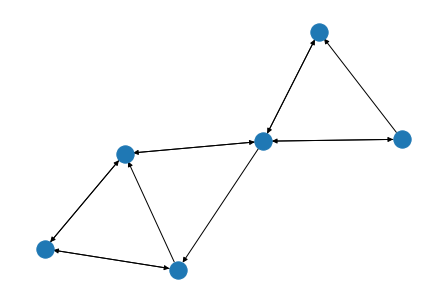

In [3]:
# Create and visualize network

net_1 = nx.DiGraph(np.transpose(pg_ex))
nx.draw_kamada_kawai(net_1)

In [ ]:
# Create the transition matrix

trans_m = pg_ex / np.sum(pg_ex, axis=0)[np.newaxis, :]
trans_m

In [ ]:
# Initial distribution

start_dist = np.ones(trans_m.shape[0]) / trans_m.shape[0]
start_dist

In [ ]:
# Function to perform algorithm
def pg_calc(m, n, start):
    temp = m
    for i in range(n):
        temp = np.matmul(temp, m)
    return np.matmul(temp, start)

In [ ]:
# Example after 32 steps
pg_calc(trans_m, 32, start_dist)

In [ ]:
# Check after how many iteration the outcome does not change

for i in range(100):
    if (pg_calc(trans_m, i, start_dist) == pg_calc(trans_m, i+1, start_dist)).all():
        print('We can stop the algorithm at step', i)
        break
    else:
        print('We still continue after step', i)

In [ ]:
# Check final distribution

pg_calc(trans_m, 71, start_dist)

In [ ]:
# Compare it to the output of the in-built pagerank function we used previously

nx.pagerank(net_1, alpha = 1)